In [1]:
#note the example data may be formatted differently from the actual data and might not work 
#unless data of the correct format is used.

#ExampleDataC can be found at
#https://www.sciencedirect.com/science/article/pii/S0360544216311744?via%3Dihub
 
#this script creates a combined heatmap of the OldBod and RadCam Electricity Data over a year

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns

In [2]:

#import the OldBod dataframe
dfOB = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\Electricity Modelling\\ExampleDataC.csv",)
dfOB['Date'] = pd.to_datetime(dfOB['Date'], format='%d/%m/%Y')



#import the RadCam dataframe
dfRC = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\Electricity Modelling\\ExampleDataC.csv",)
dfRC['Date'] = pd.to_datetime(dfRC['Date'], format='%d/%m/%Y')



#drop the date column temporarily so we can add the two dataframes together
Dates = dfOB['Date']
dfRC = dfRC.drop('Date',  axis=1)
dfOB = dfOB.drop('Date',  axis=1)


#add them together
df = dfRC.add(dfOB, fill_value=0)


#reinsert the dates
df.insert(0, 'Date', Dates)
df = df[df['Date'].dt.year == 2017] 

In [3]:
#insert relevant columns to compute a heatmap from

df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Date']=df['Date'].dt.date
df['Daily Sum'] = df.sum(axis=1)

#sort the dataframe columns in a desired order
df = df[['Month','Day','Daily Sum']]

In [4]:
#formatting the dataframe so that it can be plotted into a heatmap

df1 = df.groupby(['Month', 'Day'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
heatmap_data = pd.pivot_table(df1, values='mean', index=['Month'], columns='Day')

In [5]:
cols = list(heatmap_data)
cols.insert(0, cols.pop(cols.index('Monday')))
cols.insert(1, cols.pop(cols.index('Tuesday')))
cols.insert(2, cols.pop(cols.index('Wednesday')))
cols.insert(3, cols.pop(cols.index('Thursday')))
cols.insert(4, cols.pop(cols.index('Friday')))
cols.insert(5, cols.pop(cols.index('Saturday')))
heatmap_data = heatmap_data.loc[:, cols]


Months=df1.Month.unique().tolist()
heatmap_data=heatmap_data.loc[Months]

Text(0.5, 1.0, ' Combined Electricity usage (kWh) 2017')

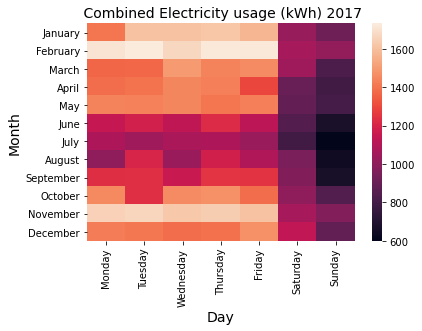

In [6]:

sns.heatmap(heatmap_data)
plt.xlabel("Day", size=14)
plt.ylabel("Month", size=14)
plt.title(" Combined Electricity usage (kWh) 2017", size=14)
